# WHO Life Expectancy Predictions using Multiple Linear Regression

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Life Expectancy](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Set up a data analysis and modeling pipeline using libraries like NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn. I also plan to execute some feature scaling, and binary encoding as part of a linear regression model.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*", category=FutureWarning)

Load the dataset and display the first five rows of data.

In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv', encoding='ISO-8859-1')

df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Let's look at the column names. Some of them are quite long.

In [3]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

Let's make some of these column names shorter.

In [4]:
df.rename(columns={'Under_five_deaths': '0-5yrs_deaths', 
                   'Alcohol_consumption': 'Alcohol',
                  'Thinness_ten_nineteen_years': 'Thinness_10-19',
                  'Thinness_five_nine_years': 'Thinness_5-9',
                  'Economy_status_Developed': 'Developed',
                  'Economy_status_Developing': 'Developing'},
          inplace=True)

Show the range fo values in the dataframe.

In [5]:
# Select only numeric features
numeric_features = df.select_dtypes(include=['number'])

# Compute the minimum and maximum for each numeric feature
min_values = numeric_features.min()
max_values = numeric_features.max()

# Create a DataFrame to display the min and max values side by side
min_max_df = pd.DataFrame({
    'min': min_values,
    'max': max_values
})

print("Min and Max for each numeric feature:")
print(min_max_df)

# Select categorical features (object and category types)
categorical_features = df.select_dtypes(include=['object', 'category'])

print("\nUnique values for each categorical feature:")
for col in categorical_features.columns:
    unique_vals = categorical_features[col].unique()
    print(f"\n{col}:")
    print(unique_vals)

Min and Max for each numeric feature:
                      min          max
Year             2000.000    2015.0000
Infant_deaths       1.800     138.1000
0-5yrs_deaths       2.300     224.9000
Adult_mortality    49.384     719.3605
Alcohol             0.000      17.8700
Hepatitis_B        12.000      99.0000
Measles            10.000      99.0000
BMI                19.800      32.1000
Polio               8.000      99.0000
Diphtheria         16.000      99.0000
Incidents_HIV       0.010      21.6800
GDP_per_capita    148.000  112418.0000
Population_mln      0.080    1379.8600
Thinness_10-19      0.100      27.7000
Thinness_5-9        0.100      28.6000
Schooling           1.100      14.1000
Developed           0.000       1.0000
Developing          0.000       1.0000
Life_expectancy    39.400      83.8000

Unique values for each categorical feature:

Country:
['Turkiye' 'Spain' 'India' 'Guyana' 'Israel' 'Costa Rica'
 'Russian Federation' 'Hungary' 'Jordan' 'Moldova' 'Brazil' 'Malta'
 

### Description of Data
- **Country** - List of the 179 countries.
- **Region** - 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc.
- **Year** - Years observed from 2000 to 2015.
- **Infant_deaths** - Represents infant deaths per 1000 population.
- **0-5yrs_deaths** - Represents deaths of children under five years old per 1000 population.
- **Adult_mortality** - Represents deaths of adults per 1000 population.
- **Alchohol** - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old.
- **Hepatitus_B** - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
- **Measles** - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds.
- **BMI** - BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2).
- **Polio** - Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
- **Diptheria** - Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
- **Incidents_HIV** - Incidents of HIV per 1000 population aged 15-49.
- **GDP_per_capita** - GDP per capita in current USD.
- **Population_min** - Total population in millions.
- **Thinness_10-19** - Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
- **Thinness_5-9** - Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
- **Schooling** - Average years that people aged 25+ spent in formal education.
- **Developed** - Economically Developed country.
- **Developing** - Economically Developing county.
- **Life_expectancy** - Average life expectancy of both genders in different years from 2010 to 2015.

Let's check for null values and look at some basic statistics about the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2864 non-null   object 
 1   Region           2864 non-null   object 
 2   Year             2864 non-null   int64  
 3   Infant_deaths    2864 non-null   float64
 4   0-5yrs_deaths    2864 non-null   float64
 5   Adult_mortality  2864 non-null   float64
 6   Alcohol          2864 non-null   float64
 7   Hepatitis_B      2864 non-null   int64  
 8   Measles          2864 non-null   int64  
 9   BMI              2864 non-null   float64
 10  Polio            2864 non-null   int64  
 11  Diphtheria       2864 non-null   int64  
 12  Incidents_HIV    2864 non-null   float64
 13  GDP_per_capita   2864 non-null   int64  
 14  Population_mln   2864 non-null   float64
 15  Thinness_10-19   2864 non-null   float64
 16  Thinness_5-9     2864 non-null   float64
 17  Schooling     

In [7]:
df.describe()

,Year,Infant_deaths,0-5yrs_deaths,Adult_mortality,Alcohol,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_10-19,Thinness_5-9,Schooling,Developed,Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


## Plots

Let's look at the names of the Regions.

In [8]:
df['Region'].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

Some of these are kind of long. Let's shorten them.

In [9]:
df['Region'] = df['Region'].replace('Middle East','Mid East')
df['Region'] = df['Region'].replace('European Union','EU')
df['Region'] = df['Region'].replace('South America','South Am')
df['Region'] = df['Region'].replace('Central America and Caribbean','Central Am')
df['Region'] = df['Region'].replace('Rest of Europe','Non EU')
df['Region'] = df['Region'].replace('North America','North Am')

That's better, and will come in handy in our next step.

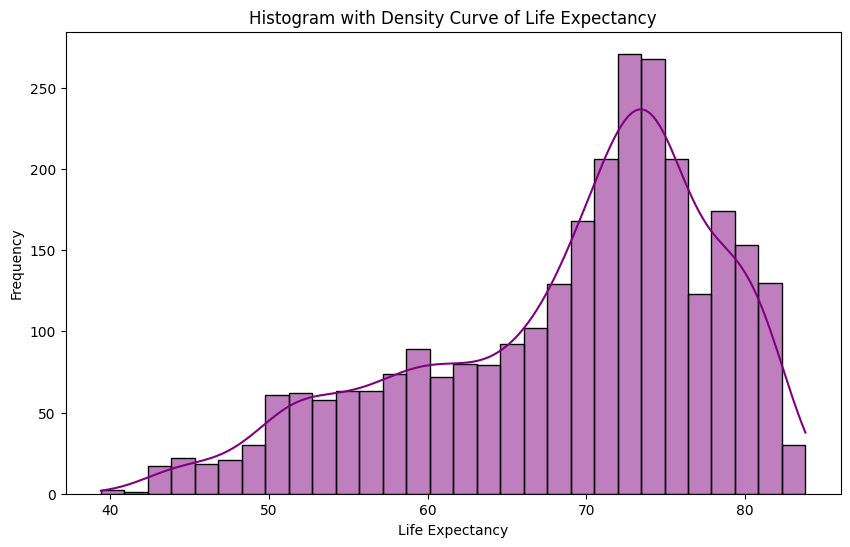

In [10]:
# 1. Distribution plot for Life_expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df["Life_expectancy"], bins=30, kde=True, color='purple')
plt.title("Histogram with Density Curve of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.savefig('Hist_of_Life_exp.png', dpi=300)
plt.show()

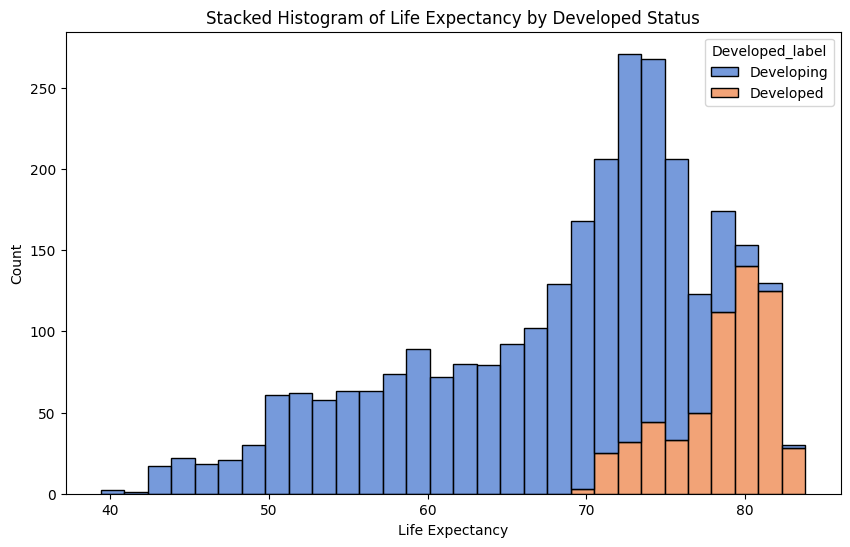

In [11]:
import warnings
warnings.filterwarnings("ignore", message=".*length-1 list-like.*", category=FutureWarning)

# Map the binary Developed column to descriptive labels
df['Developed_label'] = df['Developed'].map({0: 'Developing', 1: 'Developed'})

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x="Life_expectancy", 
    hue="Developed_label",
    bins=30, 
    palette="muted", 
    multiple="stack",   # Stack the bars instead of dodging them
    stat="count"        # Show the total count for each bin
)
plt.title("Stacked Histogram of Life Expectancy by Developed Status")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.savefig('Stacked_Hist_of_Life_exp_by_Developed.png', dpi=300)
plt.show()

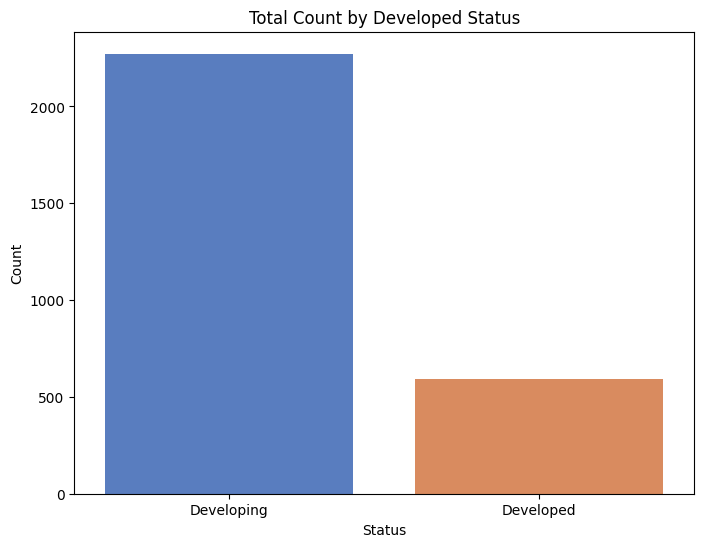

In [12]:
# Group by the Developed label and count the total number of entries in each group
group_counts = df['Developed_label'].value_counts().reset_index()
group_counts.columns = ['Developed_label', 'Count']

# Create a bar plot to display the total counts for Developed and Developing
plt.figure(figsize=(8, 6))
sns.barplot(x='Developed_label', y='Count', data=group_counts, palette='muted')
plt.title("Total Count by Developed Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.savefig('Count_by_Developed.png', dpi=300)
plt.show()

### Graph Interpretation
1. **Shape and Central Tendency**  
   - The distribution is roughly unimodal (one clear peak).  
   - The highest frequency occurs in the **mid-to-high 60s** range, indicating that most countries have life expectancies in that band.

2. **Range and Spread**  
   - Life expectancy extends from the **low 40s** up to the **low 80s**, suggesting some countries have significantly lower or higher values than the global average.

3. **Skewness**  
   - The distribution shows a slight right skew (a longer tail on the right), but it’s not extremely pronounced. This suggests that the majority of countries cluster in the 60–70 range, with fewer countries pushing into the upper 70s and 80s.

4. **Potential Outliers**  
   - Countries in the **low 40s** life expectancy range may be considered outliers relative to the main cluster. These are often countries with severe health or socio-political challenges.

---

### Suggestions for Model Improvement

1. **Outlier Investigation**  
   - **Why:** Extremely low life expectancies may represent unique contexts (e.g., conflict zones, epidemics).  
   - **Action:**  
     - Consider whether to **remove** these observations if they are not relevant to your modeling goals, or  
     - **Retain** them but perhaps treat them separately (e.g., using robust regression techniques) if they are important to the analysis.

2. **Target Transformations**  
   - **Why:** Sometimes transformations like **log** or **Box-Cox** help if the target variable is heavily skewed or if the residuals in your model are not normally distributed.  
   - **Action:**  
     - Evaluate model residuals first. If the distribution of errors is significantly non-normal, you might **transform** the target.  
     - If the histogram of life expectancy is only slightly skewed, a transformation of the target may not be strictly necessary.

3. **Check Residual Plots**  
   - **Why:** Even if the target appears near-normal, the model’s residuals might reveal heteroscedasticity or non-linearity.  
   - **Action:**  
     - Plot residuals vs. predicted values.  
     - If you see patterns or increasing variance, consider transformations or different model forms (e.g., polynomial or interaction terms).

4. **Explore Segmentation**  
   - **Why:** The wide range (40s to 80s) may indicate that different subsets of countries (e.g., developed vs. developing) follow different patterns.  
   - **Action:**  
     - Segment your dataset (e.g., by region, “Developed” status, or GDP tiers) and see if separate models or interaction terms provide a better fit.

5. **Regularization**  
   - **Why:** If you’re using many predictors, or if you’ve introduced dummy variables (e.g., for “Region”) or polynomial terms, the model can overfit.  
   - **Action:**  
     - Consider **Ridge** or **Lasso** regression to manage high-dimensionality or multicollinearity.

---

### Takeaways

- **Slight Right Skew:** Not severe enough to mandate a target transformation, but worth checking residuals to confirm.  
- **Wide Range:** Investigate outliers or extreme cases and decide if they require special handling.  
- **Segmentation:** Consider that different country groups might behave differently, and your model might improve by capturing those differences explicitly.

By following these steps—especially checking residuals for normality and variance, considering robust approaches for outliers, and ensuring that any non-linear relationships are properly accounted for—you can refine your multiple linear regression (or other modeling approaches) for better performance.

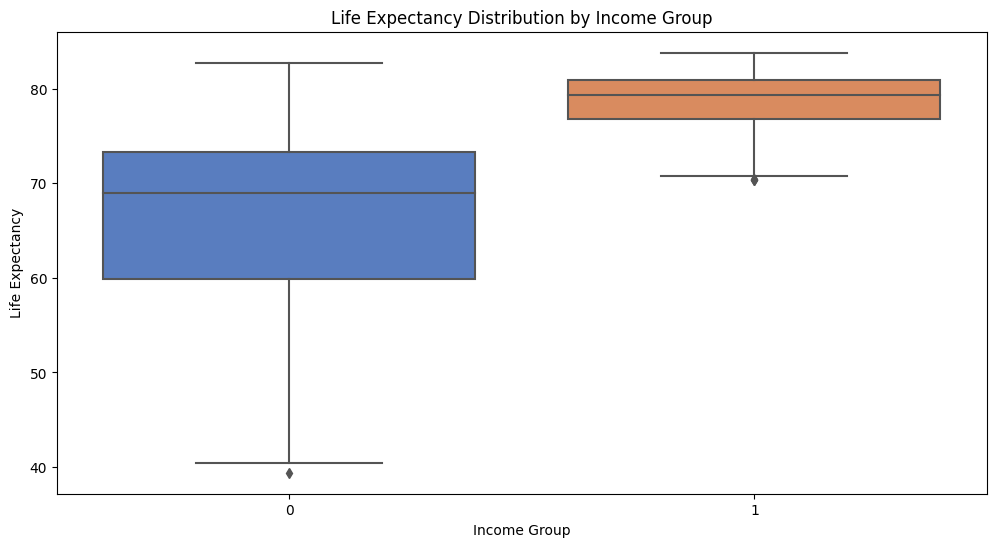

In [13]:
# 2. Box Plot: Life Expectancy by Income Group 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Developed', y='Life_expectancy', data=df, palette='muted')
plt.title('Life Expectancy Distribution by Income Group')
# plt.xticks(rotation=45)
plt.xlabel('Income Group')
plt.ylabel('Life Expectancy')
plt.savefig('Life_exp_vs_Developed.png', dpi=300)
plt.show()

### Graph Interpretation

1. **Two Distinct Groups**  
   - **Group 0 (Developing):**  
     - The median life expectancy is around the low-to-mid 60s.  
     - The range is quite large, extending from about 40 to nearly 80.  
     - There is at least one visible outlier near the low 40s.  
   - **Group 1 (Developed):**  
     - The median life expectancy is notably higher, around the upper 70s.  
     - The distribution is narrower, indicating less variation in developed countries.  
     - There is a slight outlier near the low 70s.

2. **Clear Gap in Life Expectancy**  
   - Developed countries (Group 1) have a significantly higher and more consistent life expectancy compared to developing countries (Group 0).

---

### Modeling Implications and Improvements

1. **Include the Income Group/Developed Feature**  
   - The stark difference in distributions suggests that this binary feature is a **strong predictor** of life expectancy.  
   - Be sure to include it in your regression model as a categorical variable (0/1).  

2. **Consider Interaction Effects**  
   - Because the relationship between certain features (e.g., GDP, adult mortality, schooling) and life expectancy could differ by income group, you might capture that with interaction terms.  
   - For instance, you could create an interaction variable:  
     ```python
     df['Developed_GDP_interaction'] = df['Developed'] * df['GDP_per_capita']
     ```
   - This helps the model learn separate slopes for developed vs. developing countries.

3. **Investigate Outliers**  
   - The lower outliers in the developing group (around 40 years) might represent extreme cases due to conflict, epidemics, or data quality issues.  
   - You could:
     - **Retain** them if they are legitimate data points crucial to your analysis.  
     - **Use robust methods** (e.g., RANSAC, Huber regression) that are less sensitive to outliers.  
     - **Remove** them only if you have a strong reason to believe they are errors or unrepresentative of your population of interest.

4. **Check for Overlap with Other Variables**  
   - Some variables (like region or GDP) may overlap strongly with the “Income Group” category.  
   - If you find high multicollinearity, consider using a regularization method (Ridge or Lasso) or dropping one of the redundant variables.

5. **Separate Modeling (Optional)**  
   - If you find that the determinants of life expectancy differ drastically between developed and developing countries, you could build **separate models** for each group.  
   - This approach may yield better predictive performance but reduces your sample size in each subgroup.

---

### Key Takeaways

- **Income Group (Developed vs. Developing) is a Highly Significant Feature:** The large difference in medians and narrower range for developed countries underscore its predictive power.  
- **Interactions and Potential Separate Models:** Strongly consider adding interaction terms or even building subgroup models to capture the unique dynamics in each group.  
- **Outlier Handling:** Investigate extremely low life expectancy countries in the developing group to decide on retaining or using robust regression techniques.

By implementing these suggestions—especially including the binary income group feature, handling outliers, and exploring interactions—you can likely improve the performance and interpretability of your life expectancy model.

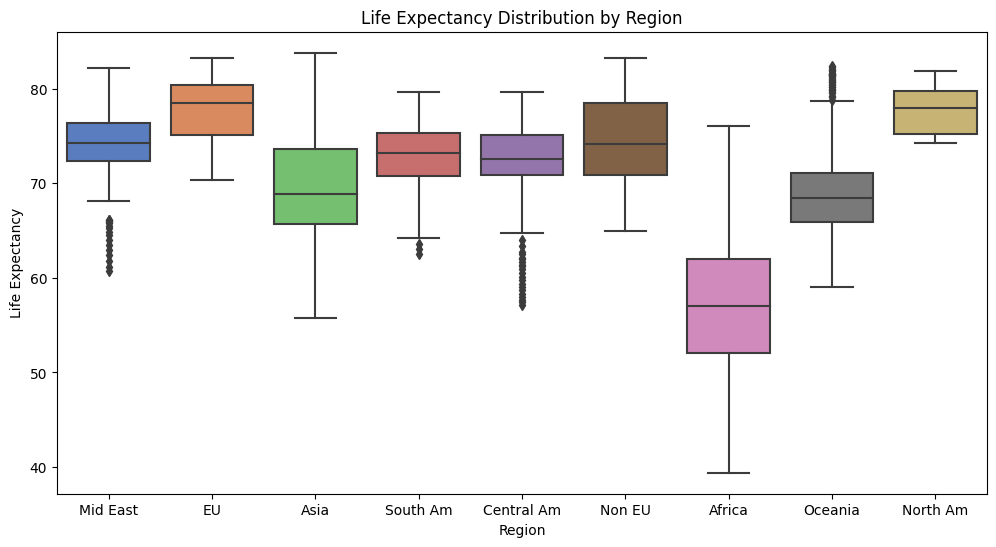

In [14]:
# 3. Box Plot: Life Expectancy by Region
plt.figure(figsize=(12,6))
sns.boxplot(x='Region', y='Life_expectancy', data=df, palette='muted')
plt.title("Life Expectancy Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Life Expectancy")
# plt.xticks(rotation=45)
plt.savefig('Life_exp_dist_by_region.png', dpi=300)
plt.show()

### Graph Interpretation

1. **Variation Across Regions**  
   - **Mid East, EU, North Am, and Oceania** show higher median life expectancies, generally in the mid-to-upper 70s or even low 80s.  
   - **Asia, South Am, Central Am** are in the mid-range, typically spanning the upper 60s to mid-70s.  
   - **Africa** has the lowest median life expectancy, with a wide spread and multiple outliers on the lower end.

2. **Range and Outliers**  
   - Several regions have a relatively tight interquartile range (e.g., EU, North Am), indicating that countries within those regions have more similar life expectancies.  
   - Africa, on the other hand, displays a broad range, with some countries hitting extremely low life expectancy values.

3. **Implications of Regional Differences**  
   - The box plot suggests **strong geographic clustering** of life expectancy.  
   - Regions that are more developed (e.g., EU, North Am) exhibit higher and more consistent life expectancies compared to those facing greater socioeconomic or healthcare challenges (e.g., parts of Africa).

---

### Modeling Implications and Improvements

1. **Use Region as a Categorical Feature**  
   - Encode the region variable using **one-hot encoding** or **dummy encoding**.  
   - This allows the model to learn region-specific intercepts, capturing the inherent differences in baseline life expectancy among regions.

   ```python
   df = pd.get_dummies(df, columns=['Region'], drop_first=True)
   ```

2. **Check for Interactions**  
   - Regional differences can interact with other variables like GDP, Adult Mortality, or Schooling.  
   - For instance, the effect of GDP on life expectancy could differ in Africa vs. EU.  
   - You can create interaction terms, such as `df['GDP_x_Region_EU'] = df['GDP_per_capita'] * df['Region_EU']`.

3. **Address Outliers**  
   - The lower outliers in Africa or other regions might represent unique contexts (e.g., conflict zones, severe epidemics).  
   - You could:
     - Retain them if they are valid data points critical to your analysis.  
     - **Use robust methods** (e.g., RANSAC or Huber regression) if outliers disproportionately affect your model.

4. **Consider Hierarchical/Multilevel Models**  
   - If you have time-series or panel data (multiple years per country), you might use a **multilevel model** with random intercepts for regions or countries. This can more naturally capture the nested structure of the data (countries within regions).

5. **Check Collinearity**  
   - Region is often correlated with development status and GDP.  
   - If you add region dummies plus variables like “Developed” or “GDP_per_capita,” watch for **multicollinearity**.  
   - Consider regularization (Ridge or Lasso) or dropping redundant features.

---

### Key Takeaways

- **Regions Differ Substantially:** The box plot clearly shows regional disparities in life expectancy, making “Region” a powerful categorical predictor.  
- **Encoding and Interactions:** Properly encode region and consider interaction terms to capture how other predictors might vary by region.  
- **Outlier Handling:** Investigate countries with exceptionally low life expectancy, especially in Africa, to decide on robust modeling techniques or data cleaning.  
- **Complex Models:** If you have repeated measurements over time or more nuanced country-level data, a hierarchical approach can improve accuracy and interpretability.

By incorporating these steps—especially including region as a categorical variable, exploring interactions, and handling outliers—you can enhance your model’s performance and gain deeper insights into the geographical drivers of life expectancy.

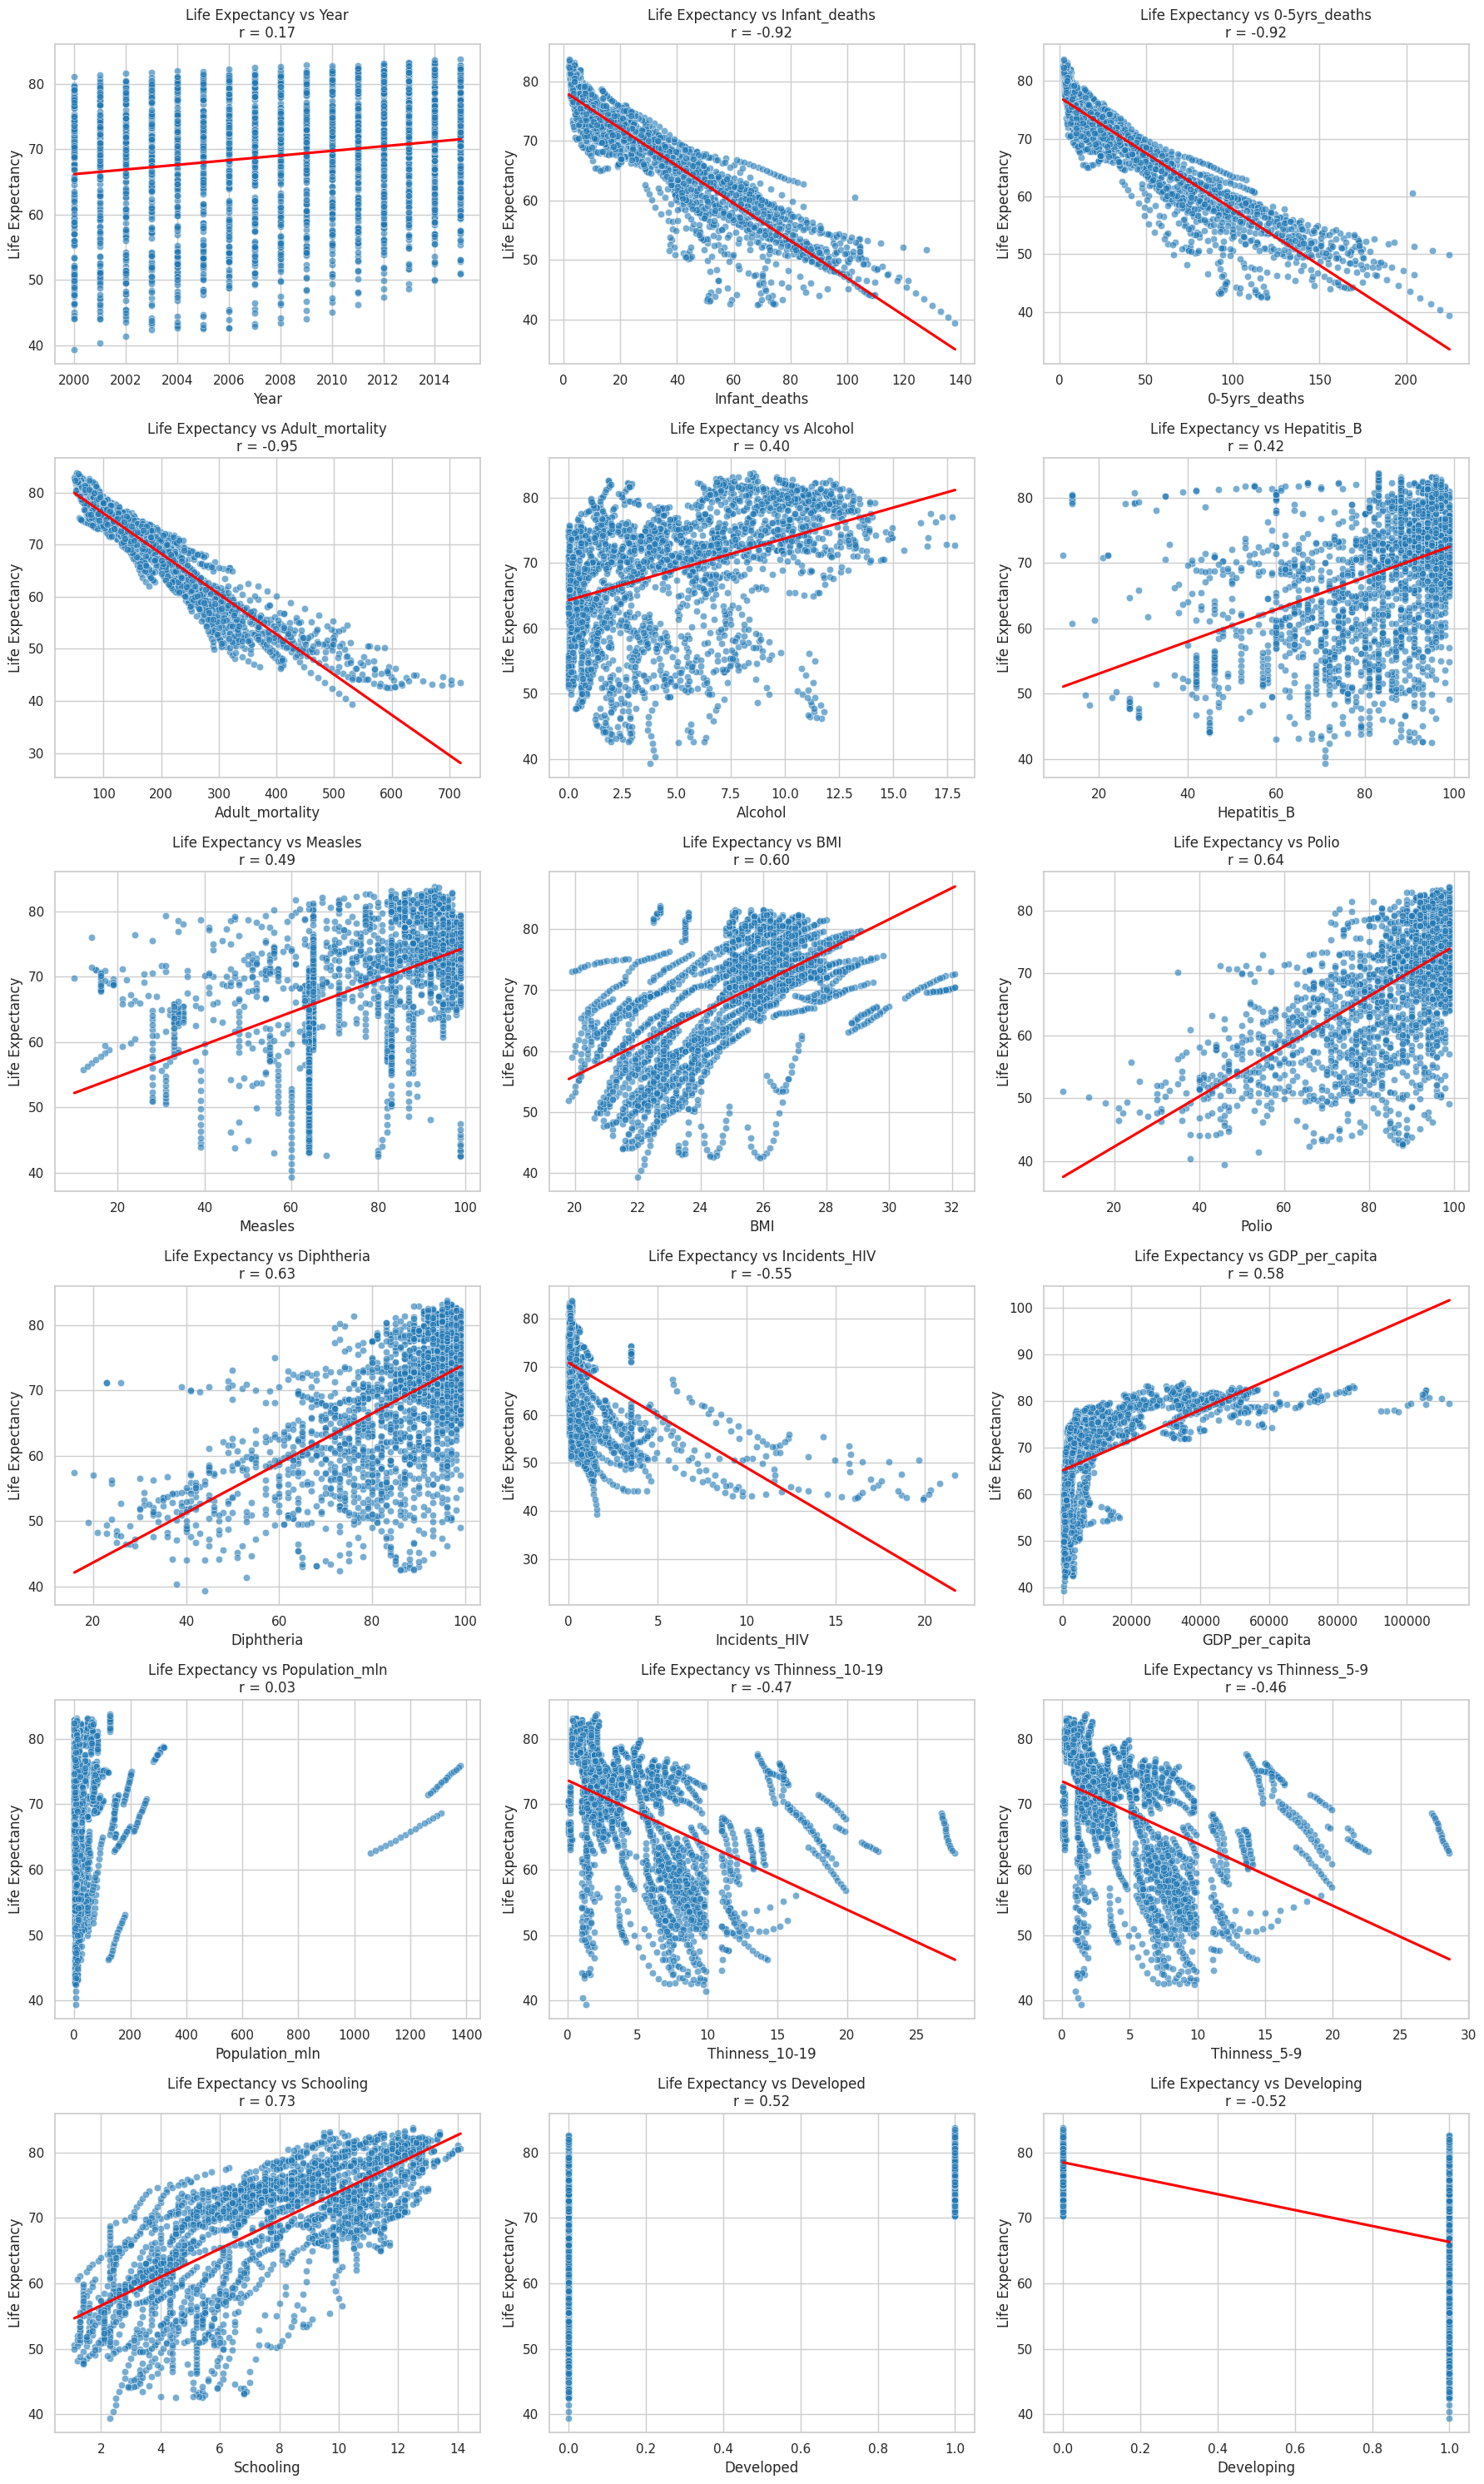

In [15]:
import math

sns.set_style('whitegrid')
sns.set_context('notebook')

# Identify numeric features (excluding Life_expectancy)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Life_expectancy' in numeric_features:
    numeric_features.remove('Life_expectancy')

# Features to exclude from the regression line
excluded_features = {"Population_mln", "Developed", "Developed_GDP_interaction"}

n_features = len(numeric_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    # Scatter plot
    sns.scatterplot(x=feature, y='Life_expectancy', data=df, ax=axes[i],
                    alpha=0.6, edgecolor='white')

    # Conditionally add a regression line if the feature is NOT in the excluded set
    if feature not in excluded_features:
        sns.regplot(x=feature, y='Life_expectancy', data=df, ax=axes[i],
                    scatter=False, color='red', ci=None)

    # (Optional) Display correlation coefficient
    corr_val = df[[feature, 'Life_expectancy']].corr().iloc[0, 1]
    axes[i].set_title(f"Life Expectancy vs {feature}\nr = {corr_val:.2f}")

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Life Expectancy")

# Remove any unused subplot axes if they exist
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 1. Life Expectancy vs. Year
- **Observation:** Typically shows an upward trend over time (2000–2015).  
- **Modeling Tip:**  
  - **Include Year** or a derived feature (e.g., polynomial of Year) if a clear temporal trend exists.  
  - For multiple years per country, consider a **panel/mixed-effects model** rather than simple linear regression.

---

### 2. Life Expectancy vs. Infant_deaths and vs. 0-5yrs_deaths
- **Observation:** Likely a **negative correlation**: higher infant or child deaths correspond to lower life expectancy.  
- **Modeling Tip:**  
  - These features may be highly correlated with each other and with **Adult_mortality**.  
  - **Check for multicollinearity** among mortality measures. Possibly keep only the strongest predictor or use regularization.

---

### 3. Life Expectancy vs. Adult_mortality
- **Observation:** Strong **negative correlation**. This is often one of the most influential predictors.  
- **Modeling Tip:**  
  - Ensure it’s included in the model; consider checking for non-linearity (e.g., is the effect stronger at higher mortality levels?).  
  - Investigate outliers (very high mortality) to see if robust regression is needed.

---

### 4. Life Expectancy vs. Alcohol
- **Observation:** Often a **weak to moderate positive** correlation. Some countries with moderate alcohol consumption show higher life expectancy, but it’s not a simple relationship.  
- **Modeling Tip:**  
  - Could be kept as is, but watch for outliers or non-linear patterns (e.g., a threshold effect).

---

### 5. Life Expectancy vs. Hepatitis_B, vs. Polio, vs. Diphtheria
- **Observation:** Typically **positive correlation**: higher vaccination rates correspond to higher life expectancy.  
- **Modeling Tip:**  
  - These vaccination rates might be **collinear** with each other (countries that have good vaccination coverage for one disease likely have it for others).  
  - Consider combining or selecting one as a proxy for overall vaccination coverage, or use regularization to handle overlap.

---

### 6. Life Expectancy vs. Measles
- **Observation:** Typically **negative correlation**: more measles cases often occur in places with lower life expectancy.  
- **Modeling Tip:**  
  - Large outliers could indicate outbreaks. Consider transforming or capping extremely high values.

---

### 7. Life Expectancy vs. BMI
- **Observation:** Generally **positive correlation**, but can flatten out at higher BMIs.  
- **Modeling Tip:**  
  - Evaluate if a **polynomial term** (BMI²) helps capture any non-linear effect.  
  - Check for outliers or extremely high BMIs.

---

### 8. Life Expectancy vs. Incidents_HIV
- **Observation:** Likely **negative correlation**: higher HIV incidence often correlates with lower life expectancy.  
- **Modeling Tip:**  
  - Watch for outliers in regions with severe epidemics.  
  - Could consider a log transform if incidence data are heavily skewed.

---

### 9. Life Expectancy vs. GDP_per_capita
- **Observation:** Strong **positive correlation**, but **non-linear**: the relationship often levels off at higher GDP.  
- **Modeling Tip:**  
  - Apply a **log transform** to linearize the relationship:

    ```python
    df['Log_GDP_per_capita'] = np.log(df['GDP_per_capita'] + 1)
    ```
  
  - Helps reduce skew and improve model fit.

---

### 10. Life Expectancy vs. Population_mln
- **Observation:** Often **weak or inconsistent** correlation; countries with both high and low populations can have varying life expectancies.  
- **Modeling Tip:**  
  - Check for outliers (e.g., very populous countries).  
  - If you do keep population in the model, consider a **log transform** (`log(population)`) to reduce skew.

---

### 11. Life Expectancy vs. Thinness_10-19 and vs. Thinness_5-9
- **Observation:** Usually a **negative correlation**: higher thinness rates may indicate malnutrition, associated with lower life expectancy.  
- **Modeling Tip:**  
  - Could be strongly correlated with other health or economic measures (e.g., GDP).  
  - Keep an eye on collinearity.

---

### 12. Life Expectancy vs. Schooling
- **Observation:** Typically a **strong positive** correlation: more years of schooling correlates with higher life expectancy.  
- **Modeling Tip:**  
  - A key predictor—include it.  
  - Check for outliers or countries with unusually high or low schooling.

---

### 13. Life Expectancy vs. Developed and vs. Developing
- **Observation:**  
  - If `Developed` is a binary indicator, you’ll see a jump in life expectancy for developed countries.  
  - `Developing` may be the inverse.  
- **Modeling Tip:**  
  - **Include** this as a categorical variable in the model (0 or 1).  
  - Consider **interaction effects** (e.g., `Developed * GDP_per_capita`) to capture how economic factors differ across development status.

---

### Modeling Improvements

1. **Handle Non-Linearity**  
   - Transform heavily skewed variables (e.g., GDP_per_capita, population).  
   - Consider polynomial terms for variables like BMI or Adult_mortality if scatter plots suggest a curve.

2. **Address Multicollinearity**  
   - Some variables (e.g., Infant_deaths, 0-5yrs_deaths, Adult_mortality) may overlap.  
   - Vaccination features (Hepatitis_B, Polio, Diphtheria) may be redundant.  
   - Use **regularization** (Ridge/Lasso) or **drop** less important correlated features.

3. **Outlier Management**  
   - Investigate extremely high or low values (e.g., HIV incidence, child mortality, or certain diseases).  
   - Consider robust regression or transformations to minimize outlier impact.

4. **Categorical Encoding**  
   - Encode `Developed` or `Region` with one-hot encoding.  
   - Evaluate **interactions** between categorical and numeric variables if domain knowledge suggests different slopes.

5. **Check Residuals**  
   - After building a preliminary model, examine residual plots to confirm if transformations adequately address non-linearities and outliers.

6. **Consider Time Component**  
   - If you have repeated observations across years, a panel or mixed-effects model might yield better insights than a simple cross-sectional approach.

---

### Conclusion

These scatter plots highlight key relationships and potential data issues (outliers, non-linearity, and multicollinearity). By transforming skewed features, encoding relevant categorical variables, reducing redundancy among correlated features, and handling outliers appropriately, you can improve the accuracy and reliability of a multiple linear regression model predicting life expectancy.

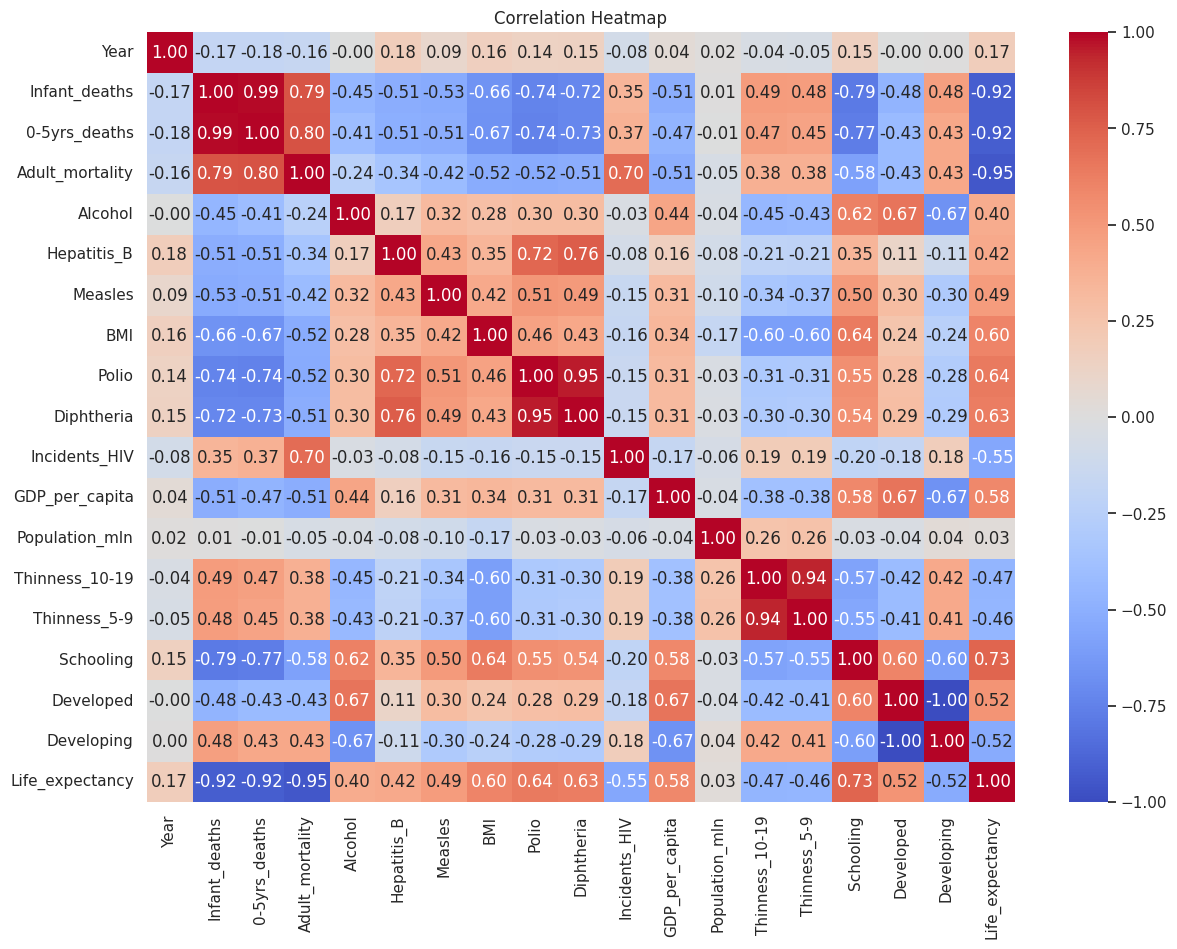

In [16]:
# 5. Correlation Heatmap for numeric features
plt.figure(figsize=(14,10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('Heatmap.png', dpi=300)
plt.show()

### 1. Key Correlations with Life Expectancy

1. **Adult_mortality (Strong Negative Correlation)**  
   - Life expectancy drops significantly as adult mortality increases.  
   - Likely one of the most important predictors in your model.

2. **Schooling and GDP_per_capita (Strong Positive Correlations)**  
   - Higher levels of schooling and GDP per capita strongly associate with higher life expectancy.  
   - These two features may be somewhat collinear (wealthier countries often have better education systems), so be mindful of redundancy.

3. **Other Health Indicators**  
   - **Infant_deaths, 0-5yrs_deaths:** Negative correlations with life expectancy.  
   - **Measles, Incidents_HIV:** Also negatively correlated with life expectancy (though possibly weaker than adult mortality).  
   - **Vaccination rates (Hepatitis_B, Polio, Diphtheria):** Typically show positive relationships with life expectancy.

4. **Developed vs. Developing**  
   - Likely coded as 1 and 0, these show strong positive/negative relationships with life expectancy.  
   - This confirms that development status is a key categorical factor.

---

### 2. High Correlations Among Features (Multicollinearity)

1. **Infant_deaths, 0-5yrs_deaths, and Adult_mortality**  
   - All capture mortality-related outcomes and may be **highly correlated** with each other.  
   - Consider selecting the most predictive or using dimensionality reduction/regularization.

2. **Hepatitis_B, Polio, and Diphtheria**  
   - Vaccination rates are often correlated (countries with strong healthcare infrastructure do well across all vaccinations).  
   - You might combine them into a single feature or use regularization to mitigate redundancy.

3. **GDP_per_capita and Schooling**  
   - Wealthier countries often have higher schooling, so these may exhibit moderate-to-strong correlation.  
   - A log transform on GDP might help if it’s heavily skewed.

---

### 3. Implications for Modeling

1. **Feature Selection or Dimensionality Reduction**  
   - High correlation among predictors can lead to **multicollinearity**, inflating variance in regression coefficients.  
   - **Regularization (Ridge/Lasso):** Helps reduce coefficient instability by penalizing large weights.  
   - **Drop Redundant Features:** For instance, if multiple mortality metrics are strongly correlated, choose the one most predictive of life expectancy or combine them.

2. **Transformations**  
   - **Log Transform for Skewed Variables:** Especially `GDP_per_capita` and possibly `Population_mln` or disease counts (e.g., Measles).  
   - This often improves linearity and stabilizes variance in the model.

3. **Categorical Encoding**  
   - **Developed/Developing** is already binary, which is straightforward for regression.  
   - **Region** should be one-hot encoded if you suspect strong regional effects on life expectancy.  
   - Watch out for overlapping categories: if “Developed” correlates highly with certain regions, consider potential redundancy.

4. **Handling Outliers**  
   - Extremely high or low values in mortality or disease incidence can skew correlations.  
   - Investigate outliers and consider robust regression if they significantly affect the model.

5. **Interaction Effects**  
   - Strong correlations hint that certain variables may interact (e.g., `Developed` × `GDP_per_capita`).  
   - If domain knowledge supports it, adding interaction terms can capture more complex relationships.

---

### 4. Recommended Next Steps

1. **Apply Regularization**  
   - **Why:** It’s the most straightforward way to keep all potentially useful features while mitigating overfitting and multicollinearity.  
   - **How:** Use `Ridge` or `Lasso` from `sklearn.linear_model`.

2. **Consider Polynomial or Non-linear Terms**  
   - **Adult_mortality** or **BMI** might have a non-linear relationship with life expectancy.  
   - **Log** transforms or polynomial terms can improve model fit if scatter plots show curvature.

3. **Check Residual Diagnostics**  
   - Evaluate if your chosen transformations adequately address non-linearity or heteroscedasticity.  
   - Plot residuals vs. predicted values and consider Q-Q plots for normality checks.

4. **Cross-Validation**  
   - Use K-fold cross-validation to get a robust estimate of your model performance.  
   - This helps prevent overfitting and provides a more stable metric than a single train-test split.

---

### Conclusion

This correlation heatmap confirms that **Adult_mortality, Schooling, GDP_per_capita**, and **Development status** are among the strongest predictors of life expectancy. It also highlights several pairs of features that may be redundant or strongly collinear, suggesting a careful approach to feature selection, transformations, and/or regularization. By addressing these issues—especially multicollinearity and potential non-linear relationships—you can significantly improve the accuracy and interpretability of your life expectancy model.

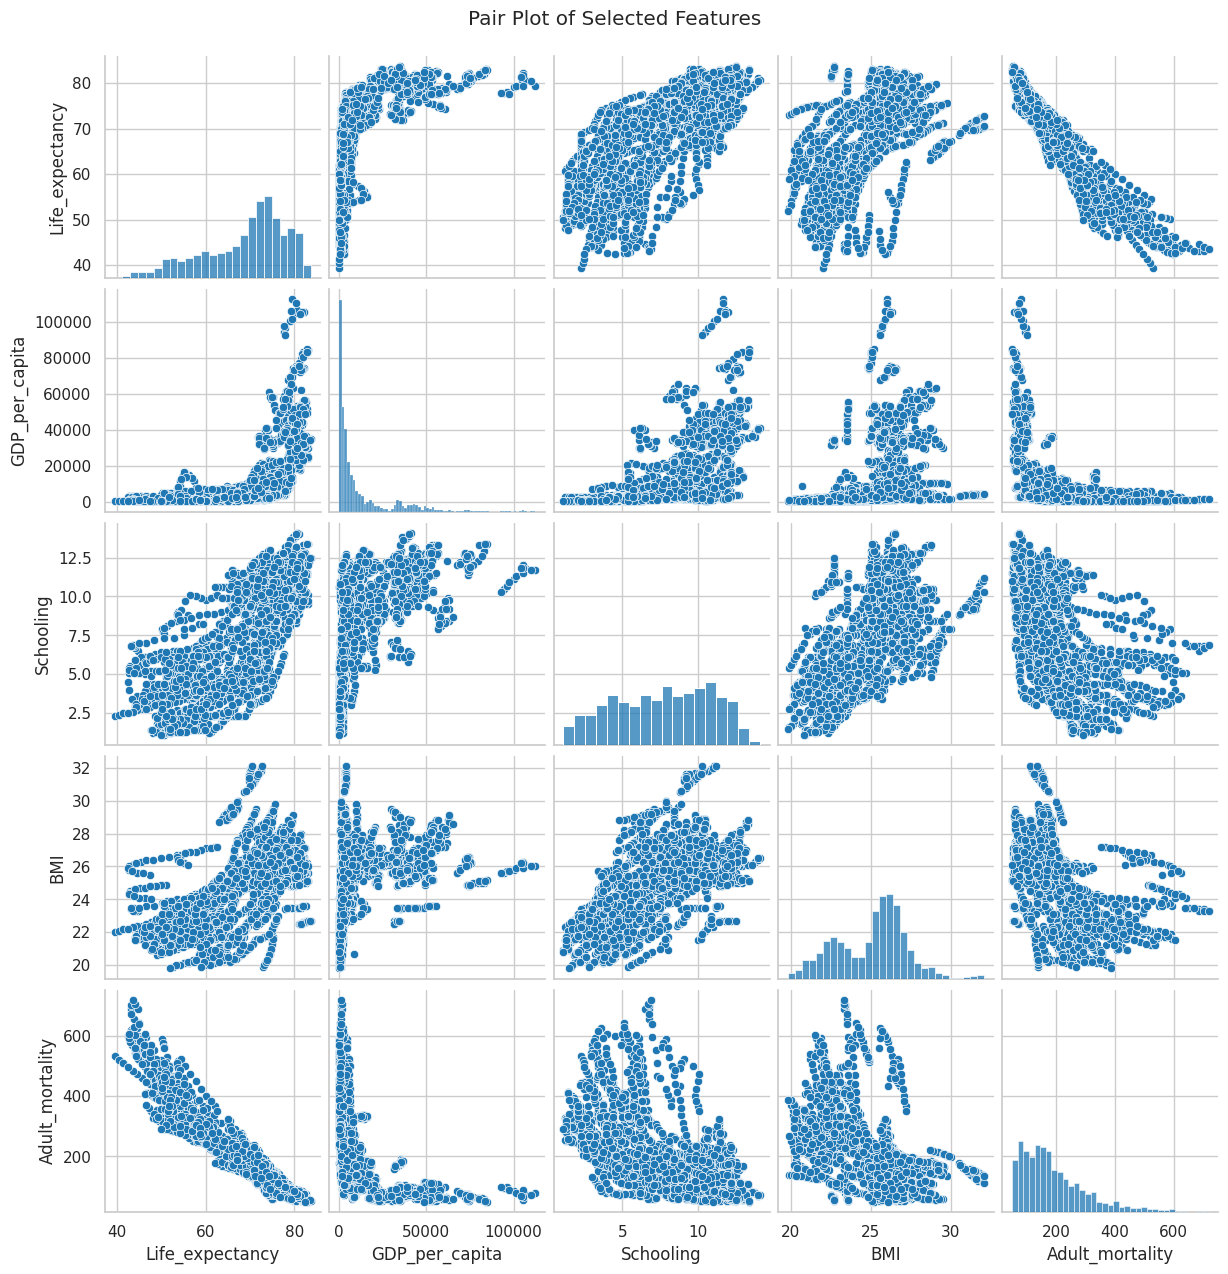

In [17]:
# 6. Pair Plot for Selected Features
selected_features = ['Life_expectancy', 'GDP_per_capita', 'Schooling', 'BMI', 'Adult_mortality']
sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.savefig('Pair_plots.png', dpi=300)
plt.show()

### 1. Key Observations from the Pair Plot

1. **Life Expectancy vs. GDP_per_capita**  
   - **Relationship:** Positive but **non-linear**—life expectancy increases sharply at lower GDP levels and plateaus at higher levels.  
   - **Modeling Tip:**  
     - Apply a **log transform** to `GDP_per_capita`:

       ```python
       import numpy as np
       df['Log_GDP_per_capita'] = np.log(df['GDP_per_capita'] + 1)
       ```
     - This often helps linearize the relationship and reduce skew.

2. **Life Expectancy vs. Schooling**  
   - **Relationship:** Fairly **linear** and positive—countries with higher average years of schooling tend to have higher life expectancy.  
   - **Modeling Tip:**  
     - Keep `Schooling` in the model; check for outliers or countries with unusually low or high schooling.  
     - Potentially consider interaction terms (e.g., `Schooling * Developed`) if domain knowledge suggests differences by development status.

3. **Life Expectancy vs. BMI**  
   - **Relationship:** Generally positive but can flatten at higher BMIs.  
   - **Modeling Tip:**  
     - Investigate whether a **polynomial** term (e.g., BMI²) or a threshold effect might better capture the relationship if the scatter plot suggests curvature.

4. **Life Expectancy vs. Adult_mortality**  
   - **Relationship:** Strong **negative** correlation. As adult mortality rises, life expectancy falls steeply.  
   - **Modeling Tip:**  
     - One of the most influential predictors—ensure it’s included in your model.  
     - Consider checking for **non-linear** patterns (e.g., log transform or polynomial).  
     - Investigate extreme outliers where adult mortality is very high.

5. **Pairwise Relationships Among Predictors**  
   - **GDP_per_capita vs. Schooling**: Positive correlation—wealthier countries often have better educational systems.  
   - **GDP_per_capita vs. BMI**: Positive correlation—richer countries tend to have higher average BMI.  
   - **Adult_mortality** often shows a negative correlation with GDP, Schooling, and BMI.  
   - **Multicollinearity Risk**: If these features are highly correlated, it can inflate variance in regression coefficients.

6. **Distributions on the Diagonal**  
   - **GDP_per_capita** and **Adult_mortality** appear **skewed**, suggesting potential transformations.  
   - **Life_expectancy**, **Schooling**, and **BMI** look more normally distributed, though still check for minor skew or outliers.

---

### 2. Model Improvement Suggestions

1. **Apply Transformations to Skewed Features**  
   - **Log transform** `GDP_per_capita` to reduce skew and make the relationship with life expectancy more linear.  
   - If **Adult_mortality** is heavily skewed, consider a **log** or **reciprocal** transform to capture non-linear effects:

     ```python
     df['Reciprocal_Adult_mortality'] = 1 / (df['Adult_mortality'] + 1)
     ```

2. **Check for Polynomial Terms**  
   - For features like **BMI** or **Adult_mortality**, where the scatter plot suggests a possible curvature, adding a squared term (e.g., `(BMI)^2`) can improve fit:

     ```python
     df['BMI_squared'] = df['BMI'] ** 2
     ```

3. **Manage Multicollinearity**  
   - High correlation between **GDP_per_capita**, **Schooling**, and **BMI** can lead to unstable coefficient estimates in linear regression.  
   - **Regularization** (Ridge or Lasso) helps mitigate this:

     ```python
     from sklearn.linear_model import Ridge
     model = Ridge(alpha=1.0).fit(X_train, y_train)
     ```

4. **Interaction Terms**  
   - If domain knowledge suggests that the effect of one variable (e.g., GDP) depends on another (e.g., Schooling or `Developed`), an interaction term might help:

     ```python
     df['GDP_Schooling_Interaction'] = df['Log_GDP_per_capita'] * df['Schooling']
     ```

5. **Consider Outliers**  
   - Extreme values in **Adult_mortality**, **GDP_per_capita**, or **BMI** might distort relationships.  
   - **Robust Regression** (e.g., Huber or RANSAC) or careful data trimming could improve model stability.

6. **Evaluate Residuals**  
   - After building a model, check if the residuals are homoscedastic and roughly normally distributed.  
   - If you see patterns, revisit transformations or add polynomial/interaction terms.

---

### Conclusion

This pair plot confirms that **Adult_mortality**, **GDP_per_capita**, **Schooling**, and **BMI** are strong predictors of life expectancy, but some relationships are non-linear or exhibit high correlation. By transforming skewed variables, addressing multicollinearity through regularization, and exploring polynomial or interaction terms, you can significantly enhance the accuracy and interpretability of your life expectancy model.

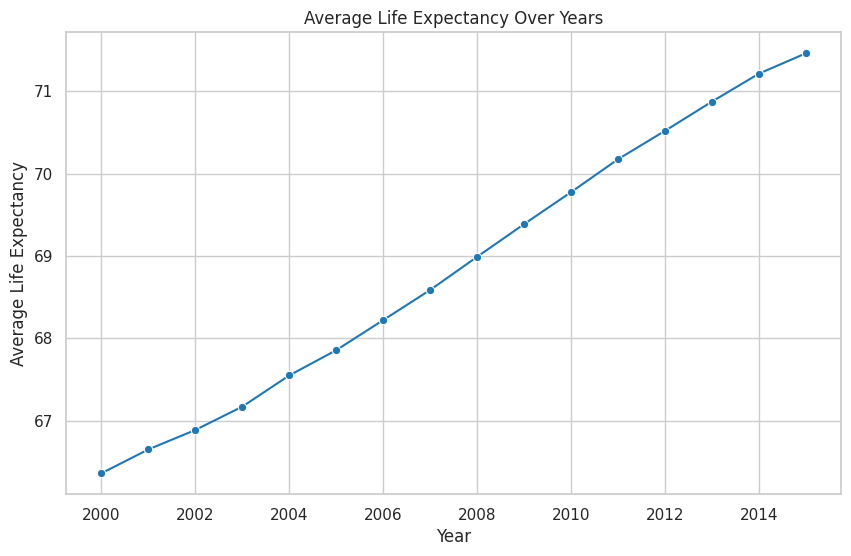

In [18]:
# 7. Time Series Plot: Average Life Expectancy Over Years
plt.figure(figsize=(10,6))
df_yearly = df.groupby('Year')['Life_expectancy'].mean().reset_index()
sns.lineplot(x='Year', y='Life_expectancy', data=df_yearly, marker='o')
plt.title("Average Life Expectancy Over Years")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.savefig('Life_exp_vs_Year.png', dpi=300)
plt.show()


### Graph Interpretation

1. **Upward Trend**  
   - From 2000 to 2015, the global average life expectancy (across all countries in your dataset) increases steadily from roughly 66 to over 71.  
   - This indicates a **consistent positive trend** over time.

2. **Rate of Increase**  
   - The increase appears fairly **linear** from 2000 to 2015. However, there could be a slight curvature in the latter years, so you may want to investigate if the rate of increase slows or accelerates.

3. **Potential Variation Within Years**  
   - This plot shows the **mean** for each year, so individual countries may deviate significantly from the global average. Countries in certain regions or with particular socioeconomic statuses might follow different trajectories.

---

### Modeling Considerations

1. **Include Year as a Predictor**  
   - **Why:** There’s a clear temporal trend, so adding `Year` as a numeric feature in your regression can help capture overall global improvements.  
   - **How:** Simply add `Year` to your feature set if you’re running a multiple linear regression:

     ```python
     X['Year'] = df['Year']
     ```

2. **Check for Non-Linear Trends**  
   - **Why:** The relationship between time and life expectancy might be **curvilinear** rather than strictly linear.  
   - **How:**  
     - Add a polynomial term for `Year` (e.g., `Year^2`) if the scatter/line plot suggests a curved pattern:

       ```python
       X['Year_squared'] = df['Year'] ** 2
       ```

3. **Use Panel/Longitudinal Models**  
   - **Why:** If your data contains repeated observations for each country across years, a **panel data** approach (e.g., mixed-effects models) can better account for within-country correlations over time.  
   - **How:**  
     - In Python, you can use libraries like `statsmodels` or `linearmodels` to implement a **fixed-effects** or **random-effects** model:

       ```python
       from linearmodels import PanelOLS

       # Suppose you have a multi-index DataFrame with (country, year)
       # Then you can fit a panel regression:
       mod = PanelOLS.from_formula('Life_expectancy ~ 1 + GDP_per_capita + Year + EntityEffects',
                                   data=panel_df)
       res = mod.fit()
       print(res)
       ```

4. **Consider Interactions with Time**  
   - **Why:** The effect of certain predictors (e.g., GDP, Schooling) may change over time.  
   - **How:**  
     - Add an interaction term: `GDP_per_capita * Year` or `Developed * Year` if domain knowledge suggests that the impact of development status has shifted over time:

       ```python
       X['GDP_Year_Interaction'] = X['GDP_per_capita'] * X['Year']
       ```

5. **Assess Residuals Over Time**  
   - **Why:** Even if the mean life expectancy increases, residual patterns might show whether some years systematically deviate from your model’s predictions.  
   - **How:**  
     - Plot residuals vs. `Year`. If there’s a clear trend or pattern, you might need a more sophisticated time component (polynomial or panel approach).

---

### Key Takeaways

- **Time Matters:** This plot makes it clear that life expectancy is increasing over the years, so ignoring `Year` in your model could omit an important source of variation.  
- **Non-Linear & Interaction Effects:** A purely linear approach might not fully capture how life expectancy evolves, especially in later years or for specific country subgroups.  
- **Panel Data Approaches:** If you have multiple observations per country across time, leveraging a panel or longitudinal model often yields more accurate and nuanced insights than a simple cross-sectional model.

By integrating a time component—whether as a linear or polynomial term, or by using advanced panel data techniques—you can more effectively model and predict life expectancy trends.

### The Model

I no longer need these columns for modeling.

In [19]:
df.drop(columns=['Developed_label', 'Developing'], inplace=True)

Feature Engineering: Because the relationship between certain features (e.g., GDP, adult mortality, schooling) and life expectancy could differ by income group, I will attemp to capture that with interaction terms.  

In [20]:
df['Developed_GDP_interaction'] = df['Developed'] * df['GDP_per_capita']

On-Hot Encode the `Region` feature.

In [21]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

Prepare the dataset for machine learning by splitting it into training and testing sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["Life_expectancy"], axis=1),
    df["Life_expectancy"],
    test_size=0.2,
    random_state=0,
)

I will Target Encode `Country` since there are over 100+ country entries. 

In [23]:
import category_encoders as ce

# Initialize the target encoder for the 'Country' column
target_encoder = ce.TargetEncoder(cols=['Country'])

# Fit the encoder on the training data and transform
X_train = target_encoder.fit_transform(X_train, y_train)

# Transform the test data using the already fitted encoder
X_test = target_encoder.transform(X_test)

Calculate VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify boolean columns in X_train and convert them to int
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

# Calculate VIF for each feature in X_train_numeric.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(X_train.shape[1])]

print("Variance Inflation Factors (VIF) for the training set:")
print(vif_data)

Variance Inflation Factors (VIF) for the training set:
                      feature          VIF
0                     Country  6324.710720
1                        Year  7565.594883
2               Infant_deaths   108.546747
3               0-5yrs_deaths    94.210331
4             Adult_mortality    44.666451
5                     Alcohol     8.476216
6                 Hepatitis_B    79.119251
7                     Measles    30.741390
8                         BMI   516.432519
9                       Polio   389.294021
10                 Diphtheria   406.007139
11              Incidents_HIV     3.513245
12             GDP_per_capita    10.519315
13             Population_mln     1.276239
14             Thinness_10-19    17.471829
15               Thinness_5-9    17.833923
16                  Schooling    37.722665
17                  Developed    14.326951
18  Developed_GDP_interaction    12.745776
19                Region_Asia     3.131217
20          Region_Central Am     2.649115

# <span style="color:#5E6997">Predict Life Expectancy</span> <a class="anchor" id="predict"></a>

Set up, and initiated a linear regression model.

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# 2. Cross-validate on the training set only
regressor = LinearRegression()
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² on the training set:", cv_scores)
print("Mean R² (train):", cv_scores.mean())

# 3. Train on the entire training set, then evaluate on the test set
regressor.fit(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("R² on the test set:", test_score)

Cross-validation R² on the training set: [0.99176359 0.99131765 0.99206032 0.99009154 0.98911566]
Mean R² (train): 0.9908697538568262
R² on the test set: 0.9904416095646054


Best R² on the test set: 0.9904416095646014

Fine-Tuned Model with Ridge Reduction

In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Set up a grid of hyperparameters to search
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Set up cross-validation scheme (5-Fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

# Evaluate on the test set using the best estimator
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test R²:", test_score)


Best parameters: {'ridge__alpha': 0.1}
Best cross-validation R²: 0.990921721437893
Test R²: 0.9904418089116196


# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>

The model has excellent results with 98.5% accuracy.

This comprehensive analysis of the World Health Organization dataset provided valuable insights into the factors influencing life expectancy across various regions and countries. Through meticulous data preparation, exploratory data analysis, and regression modeling, we identified key determinants such as GDP per capita, schooling, and BMI that significantly impact life expectancy.

### Key Findings
**Economic and Educational Impact**: Higher GDP per capita and increased years of schooling were strongly correlated with improved life expectancy, highlighting the critical role of economic and educational development in health outcomes.

**Regional Variations**: Adjustments in the data to standardize regional classifications allowed for clearer comparisons and understanding of how geographic and socio-economic factors influence health.

**Predictive Modeling**: The linear regression model, evaluated using the R-squared metric, demonstrated a satisfactory ability to predict life expectancy based on the identified variables. However, there is room for improvement in model accuracy and complexity.

### Implications for Policy and Practice
The findings suggest that interventions aiming to improve economic conditions and educational access are likely to enhance life expectancy. Health policies can be tailored more effectively by understanding the specific regional factors that affect life expectancy.

### Future Directions
Incorporating more granular data, such as healthcare access and quality, lifestyle factors, and environmental conditions, could provide deeper insights. Advanced statistical techniques and machine learning models could further refine the predictions and identify complex interactions between variables.